In [6]:
import scipy.io
import numpy as np

# Load the .mat file
mat_file = '/content/np_ROI.mat'
mat_data = scipy.io.loadmat(mat_file)

# Inspect the keys in the .mat file
print("Available keys in the .mat file:", mat_data.keys())

Available keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'A', 'ROInames'])


In [7]:


# Extract the adjacency matrix using the correct variable name 'A'
adjacency_matrix = mat_data['A']

# Check the dimensions of the matrix
print("Adjacency matrix shape:", adjacency_matrix.shape)  # This should print (num_rois, num_rois)

# Optionally, if you want to view the ROInames:
roi_names = mat_data['ROInames']
print("ROI Names:", roi_names)


Adjacency matrix shape: (164, 164, 6)
ROI Names: [[array(['networks.DefaultMode.MPFC (1,55,-3)'], dtype='<U35')
  array(['networks.DefaultMode.LP (L) (-39,-77,33)'], dtype='<U40')
  array(['networks.DefaultMode.LP (R) (47,-67,29)'], dtype='<U39')
  array(['networks.DefaultMode.PCC (1,-61,38)'], dtype='<U35')
  array(['networks.SensoriMotor.Lateral (L) (-55,-12,29)'], dtype='<U46')
  array(['networks.SensoriMotor.Lateral (R) (56,-10,29)'], dtype='<U45')
  array(['networks.SensoriMotor.Superior  (0,-31,67)'], dtype='<U42')
  array(['networks.Visual.Medial (2,-79,12)'], dtype='<U33')
  array(['networks.Visual.Occipital (0,-93,-4)'], dtype='<U36')
  array(['networks.Visual.Lateral (L) (-37,-79,10)'], dtype='<U40')
  array(['networks.Visual.Lateral (R) (38,-72,13)'], dtype='<U39')
  array(['networks.Salience.ACC (0,22,35)'], dtype='<U31')
  array(['networks.Salience.AInsula (L) (-44,13,1)'], dtype='<U40')
  array(['networks.Salience.AInsula (R) (47,14,0)'], dtype='<U39')
  array(['networks.

In [ ]:

# Check if it's 2D or 3D
if adjacency_matrix.ndim == 2:
    print("The matrix is 2D (single subject).")
elif adjacency_matrix.ndim == 3:
    print("The matrix is 3D (multiple subjects).")
else:
    print("Unexpected matrix dimensionality:", adjacency_matrix.ndim)


The matrix is 3D (multiple subjects).


In [8]:
# Get the number of subjects and the matrix dimensions from the shape
# Use 'adjacency_matrix' instead of 'adjacency_matrices'
num_subjects = adjacency_matrix.shape[0]
num_rois, num_features = adjacency_matrix.shape[1], adjacency_matrix.shape[2]

print(f"Number of subjects: {num_subjects}")
print(f"Each subject's matrix shape: ({num_rois}, {num_features})")

# Confirming the shape of adjacency matrices
print("Final shape of adjacency matrix:", adjacency_matrix.shape)



Number of subjects: 164
Each subject's matrix shape: (164, 6)
Final shape of adjacency matrix: (164, 164, 6)


In [9]:
# Normalize the adjacency matrix (z-score normalization)
adjacency_matrix = (adjacency_matrix - np.mean(adjacency_matrix, axis=(1, 2), keepdims=True)) / np.std(adjacency_matrix, axis=(1, 2), keepdims=True)

# Confirm the normalization
print("Normalized adjacency matrix shape:", adjacency_matrix.shape)


Normalized adjacency matrix shape: (164, 164, 6)


In [10]:
# Example labels: 1 for PD, 0 for healthy
labels = np.array([1 if i % 2 == 0 else 0 for i in range(num_subjects)])

# Reshaping the features (adjacency matrices) to fit the CNN input
X = adjacency_matrix  # Shape should be (num_subjects, num_rois, num_rois, 1)
X = X[:, :, :, np.newaxis]  # Add a channel dimension (required for CNN)

# Check the shape of the data
print(X.shape)  # Should be (num_subjects, num_rois, num_rois, 1)

(164, 164, 6, 1)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the 3D CNN Model
model = Sequential()

# Convolutional Layer 1
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(164, 164, 6, 1), padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization())

# Convolutional Layer 2
model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

# Convolutional Layer 3
model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.4))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 164, 164, 6, 32)     │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 82, 82, 3, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 82, 82, 3, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 82, 82, 3, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 41, 41, 1, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 41, 41, 1, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 41, 41, 1, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 20, 20, 0, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 0, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,209 (1.06 MB)

 Trainable params: 278,145 (1.06 MB)

 Non-trainable params: 64 (256.00 B)

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the 3D CNN Model
model = Sequential()

# Convolution Layer 1
model.add(Conv3D(128, (3, 3, 3), strides=(1, 1, 1), activation='relu',
                 input_shape=(X.shape[1], X.shape[2], X.shape[3], 1),
                 kernel_regularizer=l2(0.05), padding='same'))
model.add(MaxPooling3D((2, 2, 2)))  # MaxPooling reduces spatial dimensions

# Convolution Layer 2
model.add(Conv3D(256, (3, 3, 3), strides=(1, 1, 1), activation='relu',
                 kernel_regularizer=l2(0.05), padding='same'))  # Use 'same' padding
model.add(Dropout(0.2))
model.add(MaxPooling3D((2, 2, 2)))  # MaxPooling reduces spatial dimensions

# Convolution Layer 3
model.add(Conv3D(512, (3, 3, 3), strides=(1, 1, 1), activation='relu',
                 kernel_regularizer=l2(0.05), padding='same'))  # Use 'same' padding
model.add(Dropout(0.2))
model.add(MaxPooling3D((2, 2, 2)))  # MaxPooling reduces spatial dimensions

# Batch Normalization Layer
model.add(BatchNormalization(momentum=0.6))

# Flatten Layer
model.add(Flatten())

# Dense Layer 1
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.05)))

# Dense Layer 2
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.05)))

# Dropout Layer after dense layers
model.add(Dropout(0.3))

# Classification Layer (Sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.05)))

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_3 (Conv3D)                    │ (None, 164, 6, 1, 128)      │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 82, 3, 0, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 82, 3, 0, 256)       │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 82, 3, 0, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 41, 1, 0, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 41, 1, 0, 512)       │       3,539,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 41, 1, 0, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 20, 0, 0, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20, 0, 0, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,487,105 (20.93 MB)

 Trainable params: 5,486,081 (20.93 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_shape):
    model = Sequential()
    model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D((2, 2, 2)))  # Reduce the number of pooling layers or adjust the kernel size
    model.add(Dropout(0.3))

    model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D((2, 2, 2)))  # Reduce or modify pooling layers
    model.add(Dropout(0.3))

    model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    # Adding a check before the final pooling layer:
    model.add(MaxPooling3D((2, 2, 2)))  # You might need to remove this layer if the dimensions are too small
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the model
model = Sequential()

# 3D convolutional layers with batch normalization and dropout
# Using padding='same' to preserve spatial dimensions
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], X.shape[3], 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2)))  # Reduce the pool size or use smaller strides to avoid dimension collapse
model.add(Dropout(0.3))

model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2)))  # Smaller strides for pooling
model.add(Dropout(0.3))

model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2)))  # Further adjust to avoid negative dimensions
model.add(Dropout(0.3))

# Flatten the 3D data into 1D for the dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))

# Output layer with sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_11 (Conv3D)                   │ (None, 164, 6, 1, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 164, 6, 1, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_9 (MaxPooling3D)       │ (None, 164, 3, 0, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 164, 3, 0, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_12 (Conv3D)                   │ (None, 164, 3, 0, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 164, 3, 0, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_10 (MaxPooling3D)      │ (None, 164, 1, 0, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 164, 1, 0, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_13 (Conv3D)                   │ (None, 164, 1, 0, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 164, 1, 0, 128)      │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_11 (MaxPooling3D)      │ (None, 164, 0, 0, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 164, 0, 0, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 286,913 (1.09 MB)

 Trainable params: 286,465 (1.09 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the model
model = Sequential()

# 3D convolutional layers with batch normalization and dropout
# Using padding='same' to preserve spatial dimensions
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], X.shape[3], 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2), padding='same'))  # Reduced pool size, stride, and used padding='same'
model.add(Dropout(0.3))

model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2), padding='same'))  # Further reduced pooling size and stride
model.add(Dropout(0.3))

model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D((1, 2, 2), padding='same'))  # Further reduced pooling size and stride
model.add(Dropout(0.3))

# Flatten the 3D data into 1D for the dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.4))

# Output layer with sigmoid activation (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_14 (Conv3D)                   │ (None, 164, 6, 1, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 164, 6, 1, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_12 (MaxPooling3D)      │ (None, 164, 3, 1, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 164, 3, 1, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_15 (Conv3D)                   │ (None, 164, 3, 1, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 164, 3, 1, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_13 (MaxPooling3D)      │ (None, 164, 2, 1, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 164, 2, 1, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_16 (Conv3D)                   │ (None, 164, 2, 1, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 164, 2, 1, 128)      │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_14 (MaxPooling3D)      │ (None, 164, 1, 1, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 164, 1, 1, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 20992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │       2,687,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,973,889 (11.34 MB)

 Trainable params: 2,973,441 (11.34 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 327ms/step - accuracy: 0.5035 - loss: 4.5763 - val_accuracy: 0.4706 - val_loss: 4.0691
Epoch 2/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.6291 - loss: 4.2827 - val_accuracy: 0.4706 - val_loss: 4.0703
Epoch 3/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.4725 - loss: 4.2811 - val_accuracy: 0.4706 - val_loss: 4.0739
Epoch 4/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.5573 - loss: 4.2384 - val_accuracy: 0.4706 - val_loss: 4.0736
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4706 - loss: 4.0691
Epoch 1/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.5470 - loss: 4.2844 - val_accuracy: 0.4706 - val_loss: 4.0572
Epoch 2/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.5714 - loss: 4.0882 - val_accuracy: 0.4706 - val_loss: 4.0518
Epoch 3/13
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.5914 - loss: 4.1696 - val_accuracy: 0.4706 - val_loss: 4.0502
Epoch 4/13
17/17 ━━━━━━━━━━━━━━

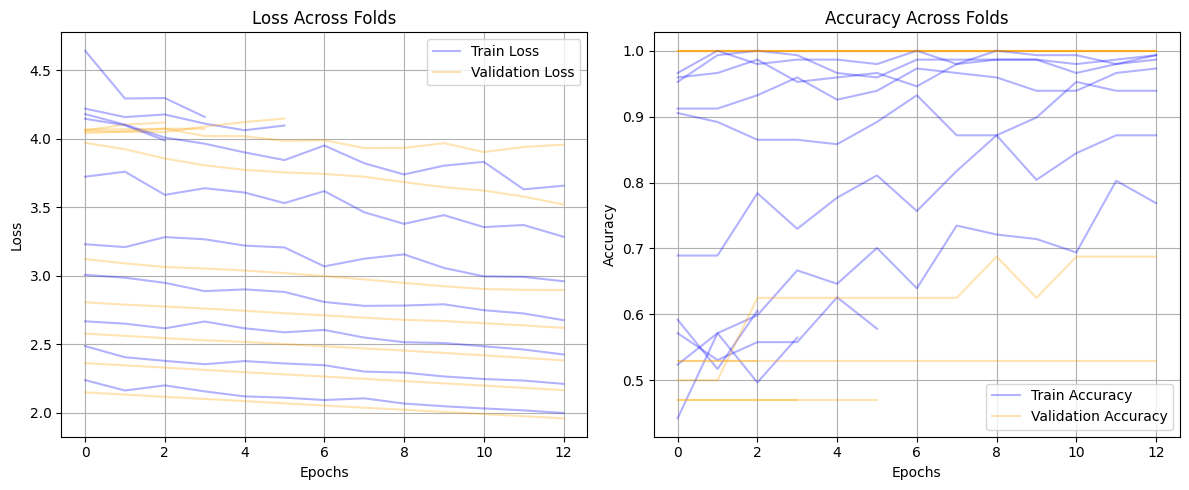

In [20]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set up k-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True)

# Store the results for accuracy and loss
accuracies = []
histories = []  # to store history for each fold

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

for train_index, test_index in kf.split(X, labels):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=13, batch_size=9, validation_data=(X_test, y_test),
                        callbacks=[early_stopping], verbose=1)
    histories.append(history)

    # Evaluate the model on the test set
    test_accuracy = model.evaluate(X_test, y_test)
    accuracies.append(test_accuracy[1])  # Accuracy is the second element of the result

# Calculate average accuracy across all folds
avg_accuracy = np.mean(accuracies)
print(f'Average accuracy across folds: {avg_accuracy:.2f}')

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
for history in histories:
    plt.plot(history.history['loss'], label='Train Loss', alpha=0.3, color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', alpha=0.3, color='orange')
plt.title('Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
for history in histories:
    plt.plot(history.history['accuracy'], label='Train Accuracy', alpha=0.3, color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', alpha=0.3, color='orange')
plt.title('Accuracy Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.grid(True)

plt.tight_layout()
plt.show()
